
 블러 처리 : 민감도를 줄인다

 인헨스 필터 : 진하게 한다.

 gray 스케일로 만드는 이유 -> 연산 속도를 올리기 위해 -> 노멀라이즈 

 k-means 클러스터링 주어진 데이터를 k개의 이미지로 묶는것 ㅈ

In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

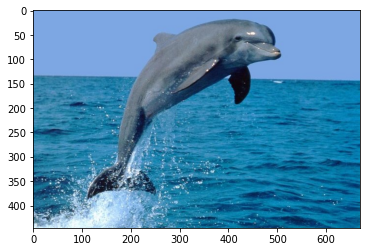

In [3]:
img = matim.imread('./images/dolphin.jpg')
plt.imshow(img)

In [4]:
# Edge Preserving Filter

@widgets.interact_manual(s = (0, 200, 1), r = (0, 1, 0.1))
def edgePreserve(s = 50, r = 0.5):
    edgeImg = cv2.edgePreservingFilter(img, sigma_s = s, sigma_r = r)

    plt.figure(figsize = (15, 8)) 
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.yticks([]), plt.xticks([])
    plt.title("Original Image")
    plt.subplot(1,2,2)
    plt.imshow(edgeImg)
    plt.title("Filter Image")
    plt.yticks([]), plt.xticks([])
    plt.show()

interactive(children=(IntSlider(value=50, description='s', max=200), FloatSlider(value=0.5, description='r', m…

In [5]:
# Detail Enhance

@widgets.interact_manual(s = (0, 80, 1), r = (0, 0.8, 0.1))
def dtail(s = 20, r = 0.2):
    detailImg = cv2.detailEnhance(img, sigma_s = s, sigma_r = r)

    plt.figure(figsize = (15, 8)) 
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.yticks([]), plt.xticks([]) # 눈금을 null 값으로 넣겠다. 
    plt.title("Original Image")
    plt.subplot(1,2,2)
    plt.imshow(detailImg)
    plt.title("Dtail Image")
    plt.yticks([]), plt.xticks([])
    plt.show()

interactive(children=(IntSlider(value=20, description='s', max=80), FloatSlider(value=0.2, description='r', ma…

In [6]:
def adjust_gamma(image, gamma = 1):
    invGamma = 1.0 / gamma 
    table = np.array([
        ((i/255)**invGamma) * 255 for i in np.arange(0, 256)
    ])
    lut_img = cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))
    return lut_img

In [7]:
img = matim.imread('./images/g1.jpg')

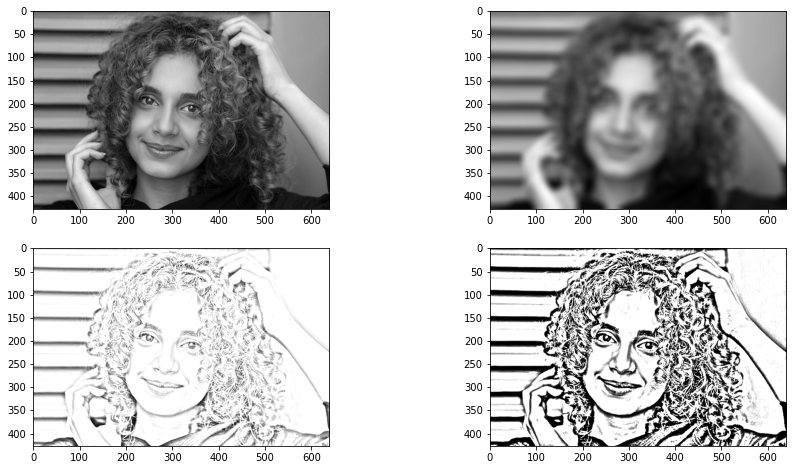

In [8]:
# pencil sketch 

ksize = 21 
sigmaX = 9
gamma = 0.1 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (ksize, ksize), sigmaX) # ksize = 3 ~ 25 / sigmaX = 1 ~ 15 
gray_blur_divide = cv2.divide(gray, gray_blur, scale = 256)
pencil_sketch = adjust_gamma(gray_blur_divide, gamma=gamma) # gamma = 0 ~ 1 

plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1) # 2행 2열짜리 에서 1번째 위치 // 총 4개를 그릴 것이다 
plt.imshow(gray, cmap = "gray")
plt.subplot(2, 2, 2)
plt.imshow(gray_blur, cmap = "gray")
plt.subplot(2, 2, 3)
plt.imshow(gray_blur_divide, cmap = "gray")
plt.subplot(2, 2, 4)
plt.imshow(pencil_sketch, cmap = "gray")

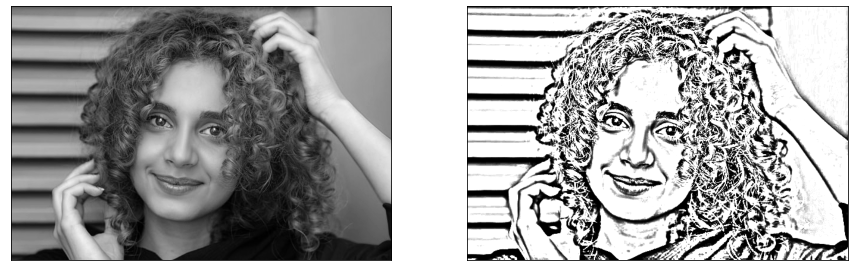

In [9]:
# 이것을 flask 로 입력 -> 출력을 할 것이다.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)  
plt.yticks([]), plt.xticks([])
plt.imshow(gray, cmap = "gray")
plt.subplot(1, 2, 2)
plt.yticks([]), plt.xticks([])
plt.imshow(pencil_sketch, cmap = "gray")

In [10]:
@widgets.interact_manual(ksize=(3, 25, 2), sigmaX = (1, 15, 2), gamma = (0, 1, 0.01))
def pencil_art_image(ksize = 21, sigmaX = 9, gamma = 0.1):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (ksize, ksize), sigmaX) # ksize = 3 ~ 25 / sigmax = 1 ~ 15
    gray_blur_divide = cv2.divide(gray, gray_blur, scale = 256)
    pencil_sketch = adjust_gamma(gray_blur_divide, gamma = gamma) # gamma = 0 ~ 1

    plt.figure(figsize = (15, 8))
    plt.subplot(1, 2, 1)
    plt.yticks([]), plt.xticks([])
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.yticks([]), plt.xticks([])
    plt.imshow(pencil_sketch, cmap = "gray")
    plt.show()

interactive(children=(IntSlider(value=21, description='ksize', max=25, min=3, step=2), IntSlider(value=9, desc…

In [14]:
img = matim.imread("./images/g3.jpg")

In [15]:
def edge_mask(img, ksize, block_size):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_median = cv2.medianBlur(gray, ksize)
    edges = cv2.adaptiveThreshold(gray_median, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, ksize)
    return edges 

In [16]:
edge_img = edge_mask(img, 5, 9)

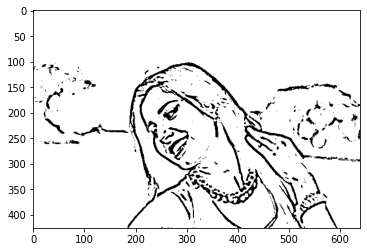

In [17]:
plt.imshow(edge_img, cmap="gray")

In [18]:
def kmeans_cluster(img, k):
    data = np.float32(img).reshape((-1, 3))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    ret, label, center = cv2.kmeans(data, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [19]:
cluster_img = kmeans_cluster(img, 6)

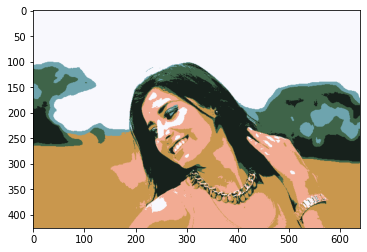

In [20]:
plt.imshow(cluster_img)

In [21]:
# edge mask와 k-means clustering 적용 = bilateral filter

d = 7
sigmacolor = 200 # > 100
sigmaspace = 200 # > 200
bilateral = cv2.bilateralFilter(cluster_img, d=d, sigmaColor=sigmacolor, sigmaSpace=sigmaspace)
cartoon = cv2.bitwise_and(bilateral, bilateral, mask = edge_img)

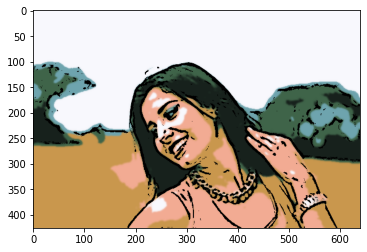

In [22]:
plt.imshow(cartoon)

In [23]:
@widgets.interact_manual(
    ksize = (3, 25, 2), 
    block_size = (1, 21, 2),
    k = (1, 20, 1),
    d = (5, 15, 2),
    sigmacolor = (1, 300),
    sigmaspace = (1, 300)
)
def cartoon_image(ksize = 5, block_size = 7, k = 7, d = 7, sigmacolor = 200, sigmaspace = 200):
    edge_Mask = edge_mask(img, ksize, block_size)
    cluster_img = kmeans_cluster(img, k)
    bilateral = cv2.bilateralFilter(cluster_img, d=d, sigmaColor=sigmacolor, sigmaSpace=sigmaspace)
    cartoon = cv2.bitwise_and(bilateral, bilateral, mask = edge_Mask)

    plt.figure(figsize = (15, 8))
    plt.subplot(1, 2, 1)
    plt.yticks([]), plt.xticks([])
    plt.title("Original Image")
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.yticks([]), plt.xticks([])
    plt.title("Cartoon Image")
    plt.imshow(cartoon)
    plt.show()

interactive(children=(IntSlider(value=5, description='ksize', max=25, min=3, step=2), IntSlider(value=7, descr…

In [24]:
img = matim.imread("./images/g2.jpg")

In [26]:
# Flask로 감싸서 해보자! 

@widgets.interact_manual(style = ["detail", "pencil", "cartoon"])
def app(style="pencil"):
    if style == "detail":
        @widgets.interact_manual(s = (0, 80, 1), r = (0, 0.8, 0.1))
        def dtail(s = 20, r = 0.2):
            detailImg = cv2.detailEnhance(img, sigma_s = s, sigma_r = r)

            plt.figure(figsize = (15, 8)) 
            plt.subplot(1,2,1)
            plt.imshow(img)
            plt.yticks([]), plt.xticks([]) # 눈금을 null 값으로 넣겠다. 
            plt.title("Original Image")
            plt.subplot(1,2,2)
            plt.imshow(detailImg)
            plt.title("Dtail Image")
            plt.yticks([]), plt.xticks([])
            plt.show()
    elif style == "pencil":
        @widgets.interact_manual(ksize=(3, 25, 2), sigmaX = (1, 15, 2), gamma = (0, 1, 0.01))
        def pencil_art_image(ksize = 21, sigmaX = 9, gamma = 0.1):
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            gray_blur = cv2.GaussianBlur(gray, (ksize, ksize), sigmaX) # ksize = 3 ~ 25 / sigmax = 1 ~ 15
            gray_blur_divide = cv2.divide(gray, gray_blur, scale = 256)
            pencil_sketch = adjust_gamma(gray_blur_divide, gamma = gamma) # gamma = 0 ~ 1

            plt.figure(figsize = (15, 8))
            plt.subplot(1, 2, 1)
            plt.yticks([]), plt.xticks([])
            plt.imshow(img)
            plt.subplot(1, 2, 2)
            plt.yticks([]), plt.xticks([])
            plt.imshow(pencil_sketch, cmap = "gray")
            plt.show()
    elif style == "cartoon":
        @widgets.interact_manual(ksize = (3, 25, 2), block_size = (1, 21, 2), k = (1, 20, 1), d = (5, 15, 2), 
        sigmacolor = (1, 300),sigmaspace = (1, 300))

        def cartoon_image(ksize = 5, block_size = 7, k = 7, d = 7, sigmacolor = 200, sigmaspace = 200):
            edge_Mask = edge_mask(img, ksize, block_size)
            cluster_img = kmeans_cluster(img, k)
            bilateral = cv2.bilateralFilter(cluster_img, d=d, sigmaColor=sigmacolor, sigmaSpace=sigmaspace)
            cartoon = cv2.bitwise_and(bilateral, bilateral, mask = edge_Mask)

            plt.figure(figsize = (15, 8))
            plt.subplot(1, 2, 1)
            plt.yticks([]), plt.xticks([])
            plt.title("Original Image")
            plt.imshow(img)
            plt.subplot(1, 2, 2)
            plt.yticks([]), plt.xticks([])
            plt.title("Cartoon Image")
            plt.imshow(cartoon)
            plt.show()
    

interactive(children=(Dropdown(description='style', index=1, options=('detail', 'pencil', 'cartoon'), value='p…